In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")

In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time
df = df[df['t_date'] < '2022-01'] #3 full years of data


In [4]:
loyalty_trends = df[df['loyalty'] == 'First Time Buyer'].copy()
loyalty_trends = loyalty_trends.groupby(['t_date']).agg(total_revenue=('price', 'sum')).reset_index()

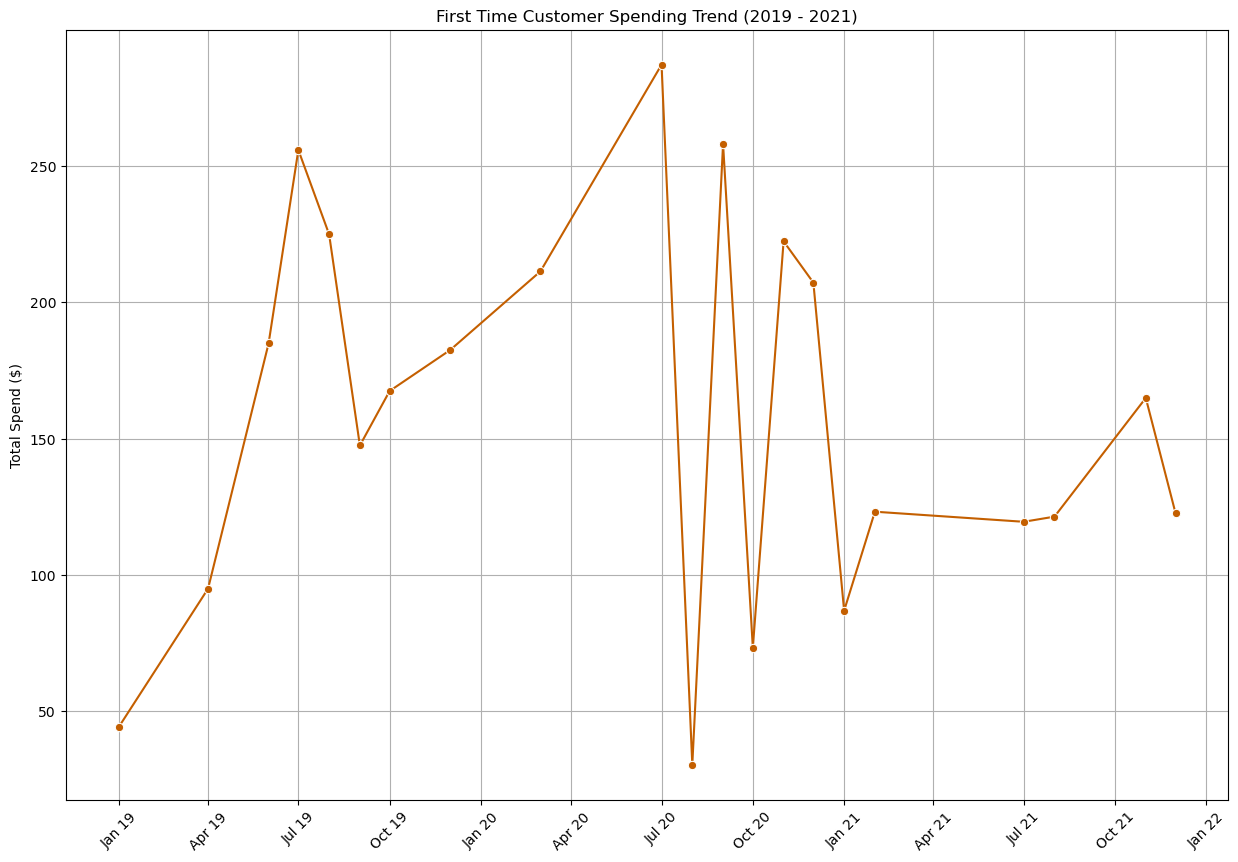

In [5]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=loyalty_trends, x='t_date', y='total_revenue', marker='o', color='#C45F00', errorbar=None)  # Capture the axes object

plt.ylabel('Total Spend ($)')
plt.xlabel('')
plt.title('First Time Customer Spending Trend (2019 - 2021)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10], interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.grid(True)

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();

